## Building a StateGraph Agent

Configure LLM model and embedding model

In [6]:
from langchain_google_genai import ChatGoogleGenerativeAI
model = ChatGoogleGenerativeAI(model = 'gemini-1.5-flash')
output = model.invoke('hi')
print(output.content)

Hi there! How can I help you today?


In [5]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name = 'BAAI/bge-small-en')
len(embeddings.embed_query('hi'))

c:\Users\ashut\OneDrive\Documents\study material\Agentic_AI_Krish\Agentic_AI\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


384

Embedded the data and store it in Vector DB

In [ ]:
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [ ]:
loader=TextLoader("usa.txt")
docs=loader.load()
docs

[Document(metadata={'source': 'usa.txt'}, page_content="🇺🇸 Overview of the U.S. Economy\nThe United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.\n\nU.S. GDP – Size, Composition, and Global Share\nAs of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 25% of the global economy. It ranks #1 in the world by nominal GDP, far ahead of China (which ranks 2nd). T

In [ ]:
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=200,
    chunk_overlap=50
)

new_docs=text_splitter.split_documents(documents=docs)
new_docs

[Document(metadata={'source': 'usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': 'usa.txt'}, page_content='The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,'),
 Document(metadata={'source': 'usa.txt'}, page_content='It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a'),
 Document(metadata={'source': 'usa.txt'}, page_content='a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.'),
 Document(metadata={'source': 'usa.txt'}, page_content='innovation, global trade, and financial services. It has a highly diversified st

In [15]:
doc_string=[doc.page_content for doc in new_docs]
doc_string

['🇺🇸 Overview of the U.S. Economy',
 'The United States of America possesses the largest economy in the world in terms of nominal GDP, making it the most powerful economic force globally. It operates under a capitalist mixed economy,',
 'It operates under a capitalist mixed economy, where the private sector dominates, but the government plays a significant regulatory and fiscal role. With a population of over 335 million people and a',
 'a population of over 335 million people and a high level of technological advancement, the U.S. economy thrives on a foundation of consumer spending, innovation, global trade, and financial services.',
 'innovation, global trade, and financial services. It has a highly diversified structure with strong sectors in technology, healthcare, finance, real estate, defense, and agriculture.',
 'U.S. GDP – Size, Composition, and Global Share',
 'As of 2024, the United States’ nominal GDP is estimated to be around $28 trillion USD, accounting for approximately 

In [19]:
db = Chroma.from_documents(new_docs,embeddings)
db

In [18]:
retriever=db.as_retriever(search_kwargs = {"k":3})
retriever.invoke("industrial growth of usa")

[Document(metadata={'source': 'usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': 'usa.txt'}, page_content='🇺🇸 Overview of the U.S. Economy'),
 Document(metadata={'source': 'usa.txt'}, page_content='Looking forward, the U.S. economy is expected to grow at a moderate pace, powered by innovation in AI, green energy, robotics, biotech, and quantum computing. The Biden administration’s Inflation')]

## LangGraph WorkFlow

In [28]:
from pydantic import BaseModel, Field
from typing import TypedDict, Annotated, Sequence
from langchain_core.messages import BaseMessage
import operator

In [25]:
class TopicaSelectionParser(BaseModel):
    Topic: str = Field(description='selected topic')
    Reasoning: str = Field(description = "Reasoning behind topic selection")
    

In [26]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicaSelectionParser)
parser.get_format_instructions()

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

'The output should be formatted as a JSON instance that conforms to the JSON schema below.\n\nAs an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}\nthe object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.\n\nHere is the output schema:\n```\n{"properties": {"Topic": {"description": "selected topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}\n```'

In [31]:
class AgentState(TypedDict):
    message : Annotated[Sequence[BaseModel], operator.add]

In [32]:
def function_1(state:AgentState):
    pass


def function_2(state:AgentState):
    pass


def function_3(state:AgentState):
    pass


def router(state:AgentState):
    pass

### Create a StateGraph

In [33]:
from langgraph.graph import StateGraph, END

In [34]:
## defining the workflow
workflow = StateGraph(AgentState)

## adding nodes into workflow
workflow.add_node("Supervisor",function_1)
workflow.add_node("RAG", function_2)
workflow.add_node("LLM", function_3)
## add starting point
workflow.set_entry_point("Supervisor")

In [35]:
workflow.add_conditional_edges(
    "Supervisor",
    router,
    {
        "RAG Call":"RAG",
        "LLM Call": "LLM"
    }
)

In [36]:
workflow.add_edge("RAG",END)
workflow.add_edge("LLM", END)

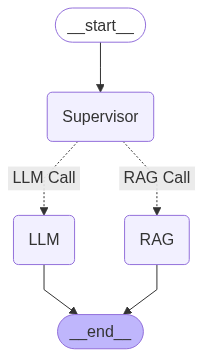

In [38]:
app_agent = workflow.compile()
app_agent